In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt


In [2]:
def GARCH(Y):
 "Initialize Params:"
 mu = param0[0]
 omega = param0[1]
 alpha = param0[2]
 beta = param0[3]
 T = Y.shape[0]
 GARCH_Dens = np.zeros(T) 
 sigma2 = np.zeros(T)   
 F = np.zeros(T)   
 v = np.zeros(T)   
 for t in range(1,T):
    sigma2[t] = omega + alpha*((Y[t-1]-mu)**2)+beta*(sigma2[t-1]); 
    F[t] = Y[t] - mu-np.sqrt(sigma2[t])*np.random.normal(0,1,1)
    v[t] = sigma2[t]
    GARCH_Dens[t] = (1/2)*np.log(2*np.pi)+(1/2)*np.log(v[t])+\
                    (1/2)*(F[t]/v[t])     
    Likelihood = np.sum(GARCH_Dens[1:-1])  
    return Likelihood


         Current function value: -2.718025
         Iterations: 1
         Function evaluations: 143
         Gradient evaluations: 22


C:\Users\gadep\OneDrive\Anakonda\lib\site-packages\ipykernel_launcher.py:21: OptimizeWarning: Unknown solver options: xtol


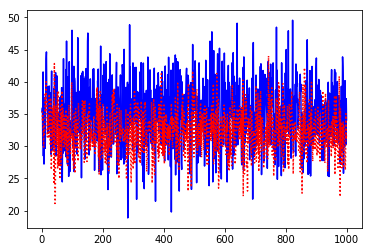

In [3]:
def GARCH_PROD(params, Y0, T):
 mu = params[0]
 omega = params[1]
 alpha = params[2]
 beta = params[3]
 Y = np.zeros(T)  
 sigma2 = np.zeros(T)
 Y[0] = Y0
 sigma2[0] = 0.0001
 for t in range(1,T):
    sigma2[t] = omega + alpha*((Y[t-1]-mu)**2)+beta*(sigma2[t-1]); 
    Y[t] = mu+np.sqrt(sigma2[t])*np.random.normal(0,1,1)    
 return Y    


T = 1000
mu = 35;
sig = 5;
Y = np.random.normal(mu,sig,T);
param0 = np.array([32, 3.5, 0.2, 0.5])
param_star = minimize(GARCH, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})
Y_GARCH = GARCH_PROD(param_star.x, Y[0], T)
timevec = np.linspace(1,T,T)
plt.plot(timevec, Y,'b',timevec, Y_GARCH,'r:')